### 목차
1. 반복과 재귀
2. 순열
3. 완전 탐색

# 반복(iteration)과 재귀(Recursion)
- 반복과 재귀는 유사한 작업을 수행할 수 있다.
- 반복은 수행하는 작업이 완료될 때까지 계속 반복
  - 루프(for,while 구조)
  - 반복문은 코드를 n번 반복시킬 수 있다.
- 재귀는 주어진 문제의 해를 구하기 위해 동일하면서 더 작은 문제의 해를 이용하는 방법
  - 하나의 큰 문제를 해결할 수 있는(해결하기 쉬운) 더 작은 문제로 쪼개고 결과들을 결합한다.
  - 재귀호출은 n 중 반복문을 만들어낼 수 있다.
  

In [ ]:
# 내가 푼 것
ans = ''
for i in range(1,4) :
    for j in range(1,4) :
        ans += str(i) + str(j)
        print(ans)
        ans = ''


In [ ]:
# 정답
for a in range(1,4) :
    for b in range(1,4) :
        print(a,b)

In [ ]:
# 1111~3333까지 출력하는 코드
for a in range(1,4) :
    for b in range(1,4) :
        for c in range(1,4) :
            for d in range(1,4) :
                print(a,b,c,d)

In [ ]:
path = []
N = 3

def run(lev) :
    if lev == N :
        print(path)
        return
    for i in range(1,4) :
        path.append(i)
        run(lev+1)
        path.pop()

#N = int(input())
run(0)

- 반복문으로는 n번 반복을 구현할 수 있고, 재귀호출로 n중 for문을 구현할 수 있다.
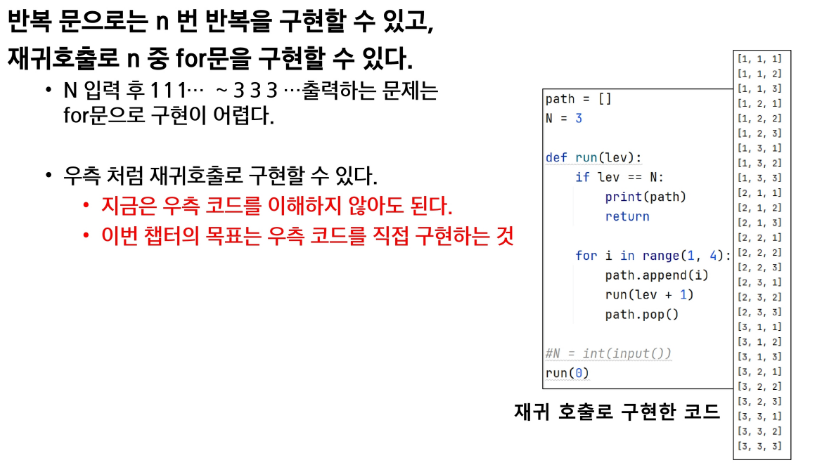 

### 재귀를 연습하기 전 알아야 할 함수의 특징
1. KFC 함수를 호출할 때 int 타입 객체를 전달하면 값만 복사가 된다.
- **정수는 원본이 바뀌지 않는다**

In [11]:
def KFC(x) :
    print(x)
    x += 1
    print(x)


x=3
KFC(x+1)
print(x)

4
5
3


2. 함수가 끝나면 Main으로 되돌아오는 것이 아니라, 해당 함수를 호출했던 곳으로 돌아온다
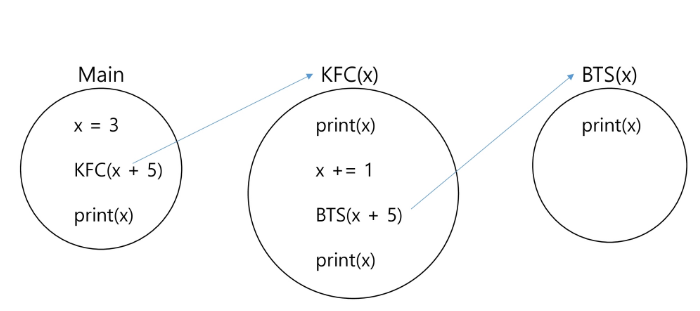

In [12]:
def BBQ(x) :
    x += 10
    print(x)

def KFC(x) :
    print(x) 
    x += 3
    BBQ(x+2)
    print(x)

x = 3
KFC(x+1)
print(x)

# 4 19 7 3 

4
19
7
3


In [13]:
# 무한재귀함수 호출

def KFC(x) :
    KFC(x+1)

KFC(0)
print('끝')

: 

In [1]:
# 무한재귀함수 호출을 막는 방법
# 아래 if 문을 기저조건(base case)라고 한다.

def KFC(x) :
    if x == 2 :
        return
    print(x)
    KFC(x+1)
    print(x)

KFC(0)
print('끝')

0
1
1
0
끝


In [2]:
# 0 1 2 3 4 5 5 4 3 2 1 0 을 재귀호출을 이용하여 구현한다
def KFC(x) :
    if x == 6 :
        return
    print(x)
    KFC(x+1)
    print(x)

KFC(0)
print('끝')

0
1
2
3
4
5
5
4
3
2
1
0
끝


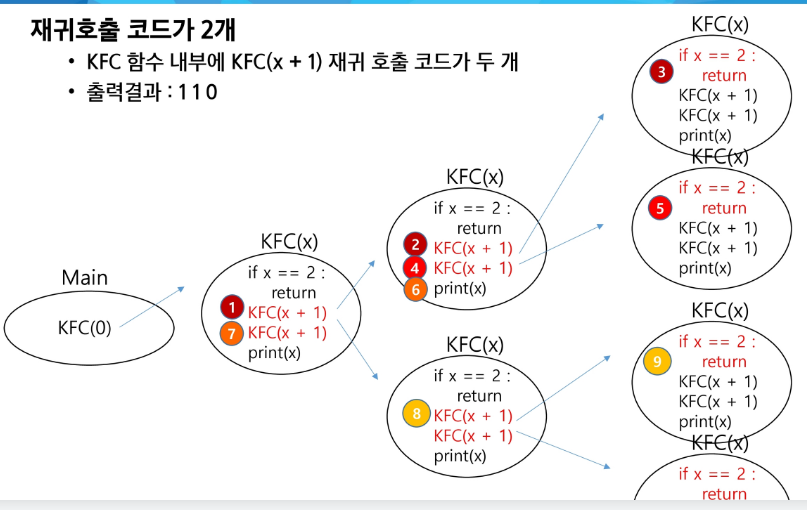

In [ ]:
# 함수의 깊이를 Level이라고 부른다
# level3, branch 4 형태의 코드

def KFC(x) :
    if x == 3 :
        return
    
    KFC(x+1)
    KFC(x+1)
    KFC(x+1)
    KFC(x+1)

KFC(0)

In [ ]:
# 위 함수를 For문으로 표현하기
def KFC(x) :
    if x == 3 :
        return
    for i in range(4) :
        KFC(x+1)
KFC(0)

# 순열(Permutation)
### 순열이란?
- 서로 다른 N개에서 R개를 중복 없이, 순서를 고려하여 나열하는 것
- 예시
  - [0][1][2] 로 구성된 3장의 카드가 다량으로 존재할 때,
  - 이 중 2장을 뽑아 순열을 나열하라(순열은 중복을 취급하지 않는다)

In [4]:
for i in range(3) :
    for j in range(3) :
        if i != j :
            print(i,j)

0 1
0 2
1 0
1 2
2 0
2 1


### 중복순열이란?
- 서로 다른 N개에서 R개를 중복을 허용하고, 순서를 고려하여 나열하는 것

In [5]:
for i in range(3) :
    for j in range(3) :
        print(i,j)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


- 중복순열 구현 원리
1. 재귀호출을 할 때마다 이동 경로를 흔적으로 남긴다.
2. 가장 마지막 레벨에 도착했을 때, 이동 경로를 출력한다.

<br>

- 순열 구현 원리
1. 재귀호출을 할 때마다, 이동 경로를 흔적으로 남긴다.
2. 가장 마지막 레벨에 도착했을 때, 이동 경로(흔적)을 출력한다. 

In [6]:
'''
<중복 순열 소스코드 흐름>

1. 먼저 path 라는 전역 리스트를 준비한다.
2. Level2, Branch3 으로 동작되는 재귀 코드를 구현한다
3. 재귀 호출을 하기 직전에 이동할 곳의 위치를 path 리스트에 기록한다.[0]
4. path.append(i) 가 시행된 후 재귀함수가 호출된다 (반복) [0,0]
5. 바닥에 도착하면 if문이 시행되어 결과가 출력된다. [0,0]
6. 함수가 리턴되고 즉시 종료된다.
7. path에 적은 마지막 기록이 삭제된다. [0]
8. 이어서 for문이 시행되고 변수 i값은 1이 된다.
9. path의 마지막에 1이 삽입된다 [0,1]
10. x==2가 되어 [0,1]이 출력된다.
11. 경로를 출력한다
'''

path = []
def KFC(x) :
    if x == 2 :
        print(path)         #11
        return
    
    for i in range(3) :
        path.append(i)      #3
        KFC(x+1)
        path.pop()          #7

KFC(0)

[0, 0]
[0, 1]
[0, 2]
[1, 0]
[1, 1]
[1, 2]
[2, 0]
[2, 1]
[2, 2]


In [8]:
# 중복순열 [1,1,1]~[6,6,6]까지 출력하는 코드를 재귀호출로 구현하자

path = []
def KFC(x) :
    if x==3 :
        print(path)
        return

    for i in range(1,7) :
        path.append(i)
        KFC(x+1)
        path.pop()

KFC(0)

[1, 1, 1]
[1, 1, 2]
[1, 1, 3]
[1, 1, 4]
[1, 1, 5]
[1, 1, 6]
[1, 2, 1]
[1, 2, 2]
[1, 2, 3]
[1, 2, 4]
[1, 2, 5]
[1, 2, 6]
[1, 3, 1]
[1, 3, 2]
[1, 3, 3]
[1, 3, 4]
[1, 3, 5]
[1, 3, 6]
[1, 4, 1]
[1, 4, 2]
[1, 4, 3]
[1, 4, 4]
[1, 4, 5]
[1, 4, 6]
[1, 5, 1]
[1, 5, 2]
[1, 5, 3]
[1, 5, 4]
[1, 5, 5]
[1, 5, 6]
[1, 6, 1]
[1, 6, 2]
[1, 6, 3]
[1, 6, 4]
[1, 6, 5]
[1, 6, 6]
[2, 1, 1]
[2, 1, 2]
[2, 1, 3]
[2, 1, 4]
[2, 1, 5]
[2, 1, 6]
[2, 2, 1]
[2, 2, 2]
[2, 2, 3]
[2, 2, 4]
[2, 2, 5]
[2, 2, 6]
[2, 3, 1]
[2, 3, 2]
[2, 3, 3]
[2, 3, 4]
[2, 3, 5]
[2, 3, 6]
[2, 4, 1]
[2, 4, 2]
[2, 4, 3]
[2, 4, 4]
[2, 4, 5]
[2, 4, 6]
[2, 5, 1]
[2, 5, 2]
[2, 5, 3]
[2, 5, 4]
[2, 5, 5]
[2, 5, 6]
[2, 6, 1]
[2, 6, 2]
[2, 6, 3]
[2, 6, 4]
[2, 6, 5]
[2, 6, 6]
[3, 1, 1]
[3, 1, 2]
[3, 1, 3]
[3, 1, 4]
[3, 1, 5]
[3, 1, 6]
[3, 2, 1]
[3, 2, 2]
[3, 2, 3]
[3, 2, 4]
[3, 2, 5]
[3, 2, 6]
[3, 3, 1]
[3, 3, 2]
[3, 3, 3]
[3, 3, 4]
[3, 3, 5]
[3, 3, 6]
[3, 4, 1]
[3, 4, 2]
[3, 4, 3]
[3, 4, 4]
[3, 4, 5]
[3, 4, 6]
[3, 5, 1]
[3, 5, 2]
[3, 5, 3]
[3, 5, 4]


In [10]:
# 중복순열 [11111] ~ [44444]
path = []

def KFC(x) :
    if x == 5 :
        print(path)
        return
    
    for i in range(1,5) :
        path.append(i)
        KFC(x+1)
        path.pop()

KFC(0)


[1, 1, 1, 1, 1]
[1, 1, 1, 1, 2]
[1, 1, 1, 1, 3]
[1, 1, 1, 1, 4]
[1, 1, 1, 2, 1]
[1, 1, 1, 2, 2]
[1, 1, 1, 2, 3]
[1, 1, 1, 2, 4]
[1, 1, 1, 3, 1]
[1, 1, 1, 3, 2]
[1, 1, 1, 3, 3]
[1, 1, 1, 3, 4]
[1, 1, 1, 4, 1]
[1, 1, 1, 4, 2]
[1, 1, 1, 4, 3]
[1, 1, 1, 4, 4]
[1, 1, 2, 1, 1]
[1, 1, 2, 1, 2]
[1, 1, 2, 1, 3]
[1, 1, 2, 1, 4]
[1, 1, 2, 2, 1]
[1, 1, 2, 2, 2]
[1, 1, 2, 2, 3]
[1, 1, 2, 2, 4]
[1, 1, 2, 3, 1]
[1, 1, 2, 3, 2]
[1, 1, 2, 3, 3]
[1, 1, 2, 3, 4]
[1, 1, 2, 4, 1]
[1, 1, 2, 4, 2]
[1, 1, 2, 4, 3]
[1, 1, 2, 4, 4]
[1, 1, 3, 1, 1]
[1, 1, 3, 1, 2]
[1, 1, 3, 1, 3]
[1, 1, 3, 1, 4]
[1, 1, 3, 2, 1]
[1, 1, 3, 2, 2]
[1, 1, 3, 2, 3]
[1, 1, 3, 2, 4]
[1, 1, 3, 3, 1]
[1, 1, 3, 3, 2]
[1, 1, 3, 3, 3]
[1, 1, 3, 3, 4]
[1, 1, 3, 4, 1]
[1, 1, 3, 4, 2]
[1, 1, 3, 4, 3]
[1, 1, 3, 4, 4]
[1, 1, 4, 1, 1]
[1, 1, 4, 1, 2]
[1, 1, 4, 1, 3]
[1, 1, 4, 1, 4]
[1, 1, 4, 2, 1]
[1, 1, 4, 2, 2]
[1, 1, 4, 2, 3]
[1, 1, 4, 2, 4]
[1, 1, 4, 3, 1]
[1, 1, 4, 3, 2]
[1, 1, 4, 3, 3]
[1, 1, 4, 3, 4]
[1, 1, 4, 4, 1]
[1, 1, 4, 4, 2]
[1, 1, 4

### 중복을 취급하지 않는 "순열" 구현 방법
1. 중복순열 코드를 작성한다.
2. 중복을 제거하는 코드를 추가하면 순열 코드가 된다.

### 중복을 제거하는 원리
- 전역 리스트를 사용하면 이미 선택했던 숫자인지 아닌지 구분할 수 있다.
- 이를 used 배열 또는 visited 배열이라고 한다. (DFS,BFS에 사용되는 것과 같다)

### 실제 적용
1. 순열 코드에 이미 사용을 한 숫자인지 아닌지 검사해주는 소스코드를 추가한다.
2. 만약 이미 사용한 숫자일 경우 재귀호출을 생략하는 코드를 추가한다.
3. 처음 사용하는 숫자라면 used에 기록을 해준다.
4. 모든 처리가 끝나고 돌아왔다면, used에 기록을 지워준다.


In [13]:
# 중복 없는 순열


path = []
used = [False, False, False]

def KFC(x) :
    if x==2 :
        print(path)
        return

    for i in range(3) :
        if used[i] == True :    # 1. 사용 여부 검사
            continue            # 2. 사용 했다면 재귀호출을 생략한다
        
        used[i] = True          # 3. 처음 방문한거라면 사용 표시
        path.append(i)
        KFC(x+1)
        path.pop()
        used[i] = False         # 4. 기록 제거

KFC(0)

[0, 1]
[0, 2]
[1, 0]
[1, 2]
[2, 0]
[2, 1]


In [ ]:
# N개의 주사위를 던져 나올 수 있는 모든 중복 순열(Type1)과 순열(Type2)을 출력하시오

N = 2
# Type1 (중복순열)

path = []

def KFC(x) :
    if x == 2 :
        print(path)
        return
    
    for i in range(1,7) :
        path.append(i)
        KFC(x+1)
        path.pop()
KFC(0)
    

In [ ]:
# N개의 주사위를 던져 나올 수 있는 모든 중복 순열(Type1)과 순열(Type2)을 출력하시오

N = 2

# Type2 (순열)

path = []
visit = [0] * 7         # 1~6번이니까

def KFC(x) :
    if x == N :
        print(path)
        return
    
    for i in range(1,7) :
        if visit == 1 :
            continue

        visit[i] = 1
        path.append(i)
        KFC(x+1)
        path.pop()
        visit[i] = 0

KFC(0)



# 완전 탐색(Brute Force)
- 모든 가능한 경우를 모두 시도해보아 정답을 찾아내는 알고리즘
- 완전 탐색 예시
  - 자전거 열쇠 비밀번호 맞추기
    - 만약 1111~9999 네 자리 숫자를 맞춰야 한다면? 
      - 4중 for문으로 모두 시도해 본다
    - 만약 1~9로 이루어진 N자리의 숫자를 맞춰야 한다면?
      - 순열코드(재귀호출)로 구현하여, 모두 시도해본다.
- 완전탐색 3문제
  - 주사위 눈금의 합, 연속 3장의 트럼프 카드, Baby-Jin(ver.완전탐색)

In [16]:
# 주사위 눈금의 합
# 3개의 주사위를 던져 나올 수 있는 중복 순열에 대해 합이 10 이하가 나오는 경우는 총 몇가지인가?

path = []
cnt = 0

def BF(x) :
    global cnt
    if x == 3 :
        if sum(path) <= 10 :
            cnt += 1
        return
    
    for i in range(1,6) :
        path.append(i)
        BF(x+1)
        path.pop()

BF(0)
print(cnt)

90


In [20]:
# cnt 변수 없이 푸는 방법

path = []

def BF(x,sum_val) :
    if x == 3 :
        # print(f'{path} = {sum_val}')
        if sum_val <= 10 :      #합계가 10 미만일 떄 출력
            print(f'{path} = {sum_val}')
        return

    
    for i in range(1,7) :
        if sum_val > 10 : break

        path.append(i)
        BF(x+1, sum_val + i)
        path.pop()
        
BF(0,0)

[1, 1, 1] = 3
[1, 1, 2] = 4
[1, 1, 3] = 5
[1, 1, 4] = 6
[1, 1, 5] = 7
[1, 1, 6] = 8
[1, 2, 1] = 4
[1, 2, 2] = 5
[1, 2, 3] = 6
[1, 2, 4] = 7
[1, 2, 5] = 8
[1, 2, 6] = 9
[1, 3, 1] = 5
[1, 3, 2] = 6
[1, 3, 3] = 7
[1, 3, 4] = 8
[1, 3, 5] = 9
[1, 3, 6] = 10
[1, 4, 1] = 6
[1, 4, 2] = 7
[1, 4, 3] = 8
[1, 4, 4] = 9
[1, 4, 5] = 10
[1, 4, 6] = 11
[1, 5, 1] = 7
[1, 5, 2] = 8
[1, 5, 3] = 9
[1, 5, 4] = 10
[1, 5, 5] = 11
[1, 5, 6] = 12
[1, 6, 1] = 8
[1, 6, 2] = 9
[1, 6, 3] = 10
[1, 6, 4] = 11
[1, 6, 5] = 12
[1, 6, 6] = 13
[2, 1, 1] = 4
[2, 1, 2] = 5
[2, 1, 3] = 6
[2, 1, 4] = 7
[2, 1, 5] = 8
[2, 1, 6] = 9
[2, 2, 1] = 5
[2, 2, 2] = 6
[2, 2, 3] = 7
[2, 2, 4] = 8
[2, 2, 5] = 9
[2, 2, 6] = 10
[2, 3, 1] = 6
[2, 3, 2] = 7
[2, 3, 3] = 8
[2, 3, 4] = 9
[2, 3, 5] = 10
[2, 3, 6] = 11
[2, 4, 1] = 7
[2, 4, 2] = 8
[2, 4, 3] = 9
[2, 4, 4] = 10
[2, 4, 5] = 11
[2, 4, 6] = 12
[2, 5, 1] = 8
[2, 5, 2] = 9
[2, 5, 3] = 10
[2, 5, 4] = 11
[2, 5, 5] = 12
[2, 5, 6] = 13
[2, 6, 1] = 9
[2, 6, 2] = 10
[2, 6, 3] = 11
[2, 6, 4] = 

# 교수님

In [29]:
N = 3
arr = [[0] * N for _ in range(N)]

#(r,c) 현재 위치 -> 오른쪽(r,c+1), 아래(r+1,c)

def dfs(r,c) :
    arr[r][c] += 1          #(r,c) 에서 해당 칸의 경로로 가는 경우의 수가 기록됨 (지나가는 길을 모두 기록하기 때문에)
    # 도착점(N-1,N-1)에 도착
    if r == N-1 and c == N-1 :
        # return
        for line in arr :
            print(*line)
        # input() #단계별로 확인할 수 있게 멈추기
        return
    
    
    #오른쪽이나 아래로 이동
    #오른쪽으로 갈 수 있는지
    if c+1 <N :
        dfs(r,c+1)
    #아래로 갈 수 있는지
    if r+1 <N :
        dfs(r+1,c)

dfs(0,0)
total = 0
for r in range(N) :
    total += sum(arr[r])
    
# print(total)
# print(f'#{tc} {total}')

1 1 1
0 0 1
0 0 1
1 1 1
0 1 2
0 0 2
1 1 1
0 1 2
0 1 3
1 1 1
1 2 3
0 1 4
1 1 1
1 2 3
0 2 5
1 1 1
1 2 3
1 3 6
